In [1]:
import cv2
import torch
import torchreid
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from time import time
from torchvision.transforms import (
    Resize, Compose, ToTensor, Normalize
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

/home/cognitive/anaconda/envs/reid/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


## ------------------------------------------------- Model execution time -------------------------------------------------

In [2]:
def check_model_time(model, dummy_input, repetitions=100):
    # INIT LOGGERS
    starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)
    timings=np.zeros((repetitions, 1))
    
    # GPU-WARM-UP
    for _ in range(10):
        _ = model(dummy_input)
        
    # MEASURE PERFORMANCE
    with torch.no_grad():
        for rep in range(repetitions):
            starter.record()
            _ = model(dummy_input)
            ender.record()
            
            # WAIT FOR GPU SYNC
            torch.cuda.synchronize()
            curr_time = starter.elapsed_time(ender)
            timings[rep] = curr_time
            
    mean_syn = np.sum(timings) / repetitions
    std_syn = np.std(timings)

    return mean_syn, std_syn

Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_25_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_5_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_75_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


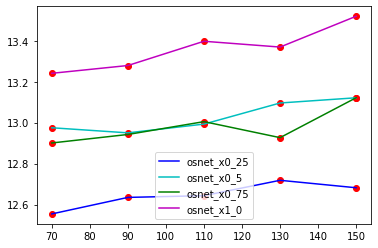

In [3]:
model_names = ['osnet_x0_25', 'osnet_x0_5', 'osnet_x0_75', 'osnet_x1_0']

dx = 20
start_res, end_res = 70, 150
resol_range = range(start_res, end_res + 1, dx)
colors = ['b', 'c', 'g', 'm']

for i, model_name in enumerate(model_names):
    reid_model = torchreid.models.build_model(
        name=model_name, num_classes=2, pretrained=True
    ).eval().to(device)

    times = []
    for size in resol_range:
        img = torch.randn(1, 3, size, size, dtype=torch.float).to(device)
        mean_syn, _ = check_model_time(reid_model, img)    
        times.append(mean_syn)

    plt.plot(resol_range, times, c=colors[i])
    plt.scatter(resol_range, times, c='r')
#     ax[i].set_ylim(10, 30)

plt.legend(model_names)
plt.show();

Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_25_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_5_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_75_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


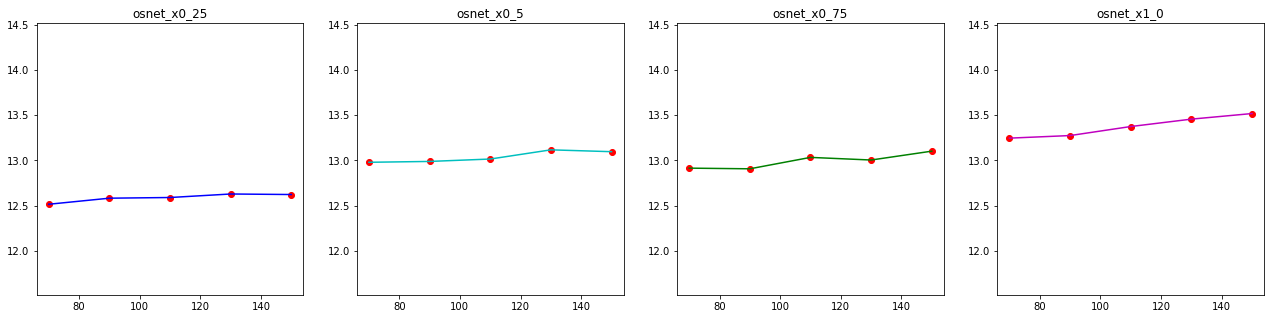

In [4]:
model_names = ['osnet_x0_25', 'osnet_x0_5', 'osnet_x0_75', 'osnet_x1_0']
colors = ['b', 'c', 'g', 'm']
dx = 20
start_res, end_res = 70, 150
resol_range = range(start_res, end_res + 1, dx)

all_times = []
for model_name in model_names:
    reid_model = torchreid.models.build_model(
        name=model_name, num_classes=2, pretrained=True
    ).eval().to(device)

    model_durations = []
    for size in resol_range:
        img = torch.randn(1, 3, size, size, dtype=torch.float).to(device)
        mean_syn, _ = check_model_time(reid_model, img)    
        model_durations.append(mean_syn)
        
    all_times.append(model_durations)
    
all_times = np.asarray(all_times)

fig, ax =  plt.subplots(1, len(model_names), figsize=(22, 5))
mn_all_times, mx_all_times = all_times.min() - 1, all_times.max() + 1
for i in range(len(all_times)):
    times = all_times[i]
    ax[i].plot(resol_range, times, c=colors[i])
    ax[i].scatter(resol_range, times, c='r')
    ax[i].set_title(model_names[i])
    ax[i].set_ylim(mn_all_times, mx_all_times)

plt.show();

Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_25_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_5_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x0_75_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


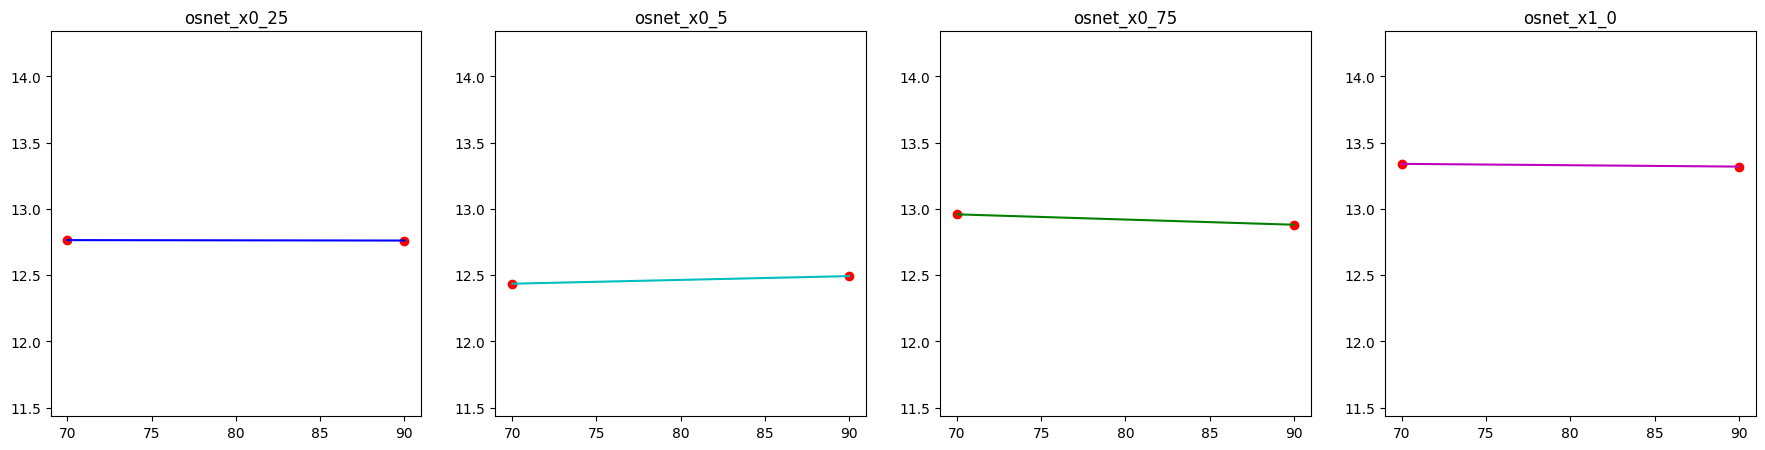

In [5]:
model_names = ['osnet_x0_25', 'osnet_x0_5', 'osnet_x0_75', 'osnet_x1_0']
colors = ['b', 'c', 'g', 'm']
dx = 20
start_res, end_res = 70, 100
resol_range = range(start_res, end_res + 1, dx)

all_times = []
for model_name in model_names:
    reid_model = torchreid.models.build_model(
        name=model_name, num_classes=2, pretrained=True
    ).eval().to(device)

    model_durations = []
    for size in resol_range:
        img = torch.randn(1, 3, 256, 128, dtype=torch.float).to(device)
        mean_syn, _ = check_model_time(reid_model, img)    
        model_durations.append(mean_syn)
        
    all_times.append(model_durations)
    
all_times = np.asarray(all_times)

fig, ax =  plt.subplots(1, len(model_names), figsize=(22, 5))
mn_all_times, mx_all_times = all_times.min() - 1, all_times.max() + 1
for i in range(len(all_times)):
    times = all_times[i]
    ax[i].plot(resol_range, times, c=colors[i])
    ax[i].scatter(resol_range, times, c='r')
    ax[i].set_title(model_names[i])
    ax[i].set_ylim(mn_all_times, mx_all_times)

plt.show();

## ---------------------------------------------------------------------------------------------------------------------------

## ------------------------------------------------- Activation Maps --------------------------------------------------

In [5]:
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]
GRID_SPACING = 10

@torch.no_grad()
def visactmap(
    model,
    img_paths,
    size,
    img_mean=IMAGENET_MEAN,
    img_std=IMAGENET_STD
):

    model.eval()
    
    transform_tr = Compose([
        Resize((size, size)),
        ToTensor(),
        Normalize(mean=img_mean, std=img_std),
    ])
    
    for img_path in img_paths:
        
        img = cv2.imread(img_path)
        img = Image.fromarray(np.uint8(img)).convert('RGB')
        img = transform_tr(img).to(device)[None]
        
        outputs = reid_model(img, return_featuremaps=True)
        
        # compute activation maps
        outputs = (outputs ** 2).sum(dim=1)
        b, h, w = outputs.size()
        outputs = outputs.view(b, h * w)
        outputs = torch.nn.functional.normalize(outputs, p=2, dim=1)
        outputs = outputs.view(b, h, w)

        img, outputs = img.cpu(), outputs.cpu()

        for j in range(outputs.size(0)):

            # RGB image
            img_ = img[j, ...]
            for t, m, s in zip(img_, img_mean, img_std):
                t.mul_(s).add_(m).clamp_(0, 1)
                
            img_np = np.uint8(np.floor(img_.numpy() * 255))
            img_np = img_np.transpose((1, 2, 0)) # (c, h, w) -> (h, w, c)

            # activation map
            am = outputs[j, ...].numpy()
            am = cv2.resize(am, (size, size))

            am = 255 * (am - np.min(am)) / (
                np.max(am) - np.min(am) + 1e-12
            )

            am = np.uint8(np.floor(am))
            am = cv2.applyColorMap(am, cv2.COLORMAP_JET)

            # overlapped
            overlapped = img_np*0.3 + am*0.7
            overlapped[overlapped > 255] = 255
            overlapped = overlapped.astype(np.uint8)

            # save images in a single figure (add white spacing between images)
            # from left to right: original image, activation map, overlapped image
            grid_img = 255 * np.ones(
                (size, 3*size + 2*GRID_SPACING, 3), dtype=np.uint8
            )
            grid_img[:, :size, :] = img_np
            grid_img[:,
                     size + GRID_SPACING:2*size + GRID_SPACING, :] = am
            grid_img[:, 2*size + 2*GRID_SPACING:, :] = overlapped
            
            plt.imshow(grid_img[..., ::-1])
            plt.show()

In [7]:
model_name = 'osnet_x1_0'  # osnet_x1_0 osnet_x0_75 osnet_x0_5 osnet_x0_25
reid_model = torchreid.models.build_model(name=model_name, num_classes=2).eval().to(device)

weight_path = f"log/Good Models/Osnet_x1_0/vgg_size_150/model.pth.tar-111"
torchreid.utils.load_pretrained_weights(reid_model, weight_path) 

Successfully loaded imagenet pretrained weights from "/home/server/.cache/torch/checkpoints/osnet_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Successfully loaded pretrained weights from "log/Good Models/Osnet_x1_0/vgg_size_150/model.pth.tar-111"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


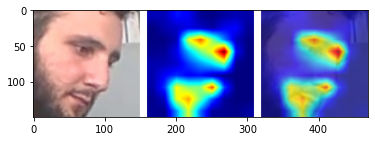

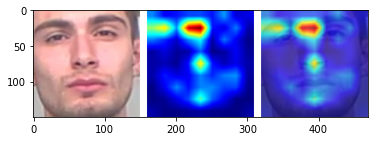

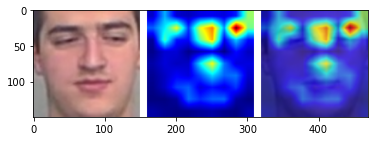

In [8]:
size = 150
img_paths = [
    'Encodings/encs_14_04_22/Aram/Aram_5.jpg',  # 0-69
    'Encodings/encs_14_04_22/Sergo/Sergo_150.jpg',  # 70-180
    'Encodings/encs_14_04_22/Rob/Rob_228.jpg'  # 183-357
]
visactmap(reid_model, img_paths, size)

## ---------------------------------------------------------------------------------------------------------------------------